# Analysis of the MITgcm simulations

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import scipy.io

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import cmocean


# Pretty plots
plt.rcParams['figure.figsize'] = (8, 8) # set default figure size to 12x12 inches
plt.rc('text',usetex=True)
#font = {'family':'serif','size':16}
font = {'family':'DejaVu Sans','size':16, 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':14})
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


/anaconda3/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
base_dir = '/Users/doddridge/Desktop/ice-ocean-governor/'

mitruns = xr.open_dataset(base_dir + 'ALL_MITrhos.nc')
icedata = xr.open_dataset(base_dir + 'ALL_icedata.nc')
mitgcm_fwc_salinity = scipy.io.loadmat(base_dir + 'JRSCOTT_Arctic_data.mat')
mitgcm_mean_salt = scipy.io.loadmat(base_dir + 'JRSCOTT_Arctic_salt.mat')
slon = np.arange(0.5,360)
slat = np.arange(-89.5,90.5)
mitgcm_ice_vels = scipy.io.loadmat(base_dir + 'JRSOTT_ice_velocities_latlon.mat')


In [3]:
prosh_fwc = pd.read_csv('/Volumes/Lagarostrobos/datasets/observations/arctic_freshwater/prosh_fwc.txt',
                        index_col=0, header=0)


In [4]:
kappa = np.array([50, 100, 300, 500, 800, 1000, 2000])


In [5]:
mitruns


<xarray.Dataset>
Dimensions:           (Depth: 50, cp: 2, cpm: 3, x: 210, y: 192)
Coordinates:
  * Depth             (Depth) float32 -5.0 -15.0 -25.0 ... -5461.25 -5906.25
Dimensions without coordinates: cp, cpm, x, y
Data variables:
    lat               (y, x) float32 ...
    lon               (y, x) float32 ...
    mitb50_rho        (cpm, Depth, y, x) float32 ...
    mitb100_rho       (cpm, Depth, y, x) float32 ...
    mitb300_rho       (cpm, Depth, y, x) float32 ...
    mitb500_rho       (cpm, Depth, y, x) float32 ...
    mitb800_rho       (cpm, Depth, y, x) float32 ...
    mitb1000_rho      (cpm, Depth, y, x) float32 ...
    mitb2000_rho      (cp, Depth, y, x) float32 ...
    mitb500_lkv_rho   (cp, Depth, y, x) float32 ...
    mitb500_hkv_rho   (cp, Depth, y, x) float32 ...
    mitb500_h4kv_rho  (cp, Depth, y, x) float32 ...

In [6]:
icedata

<xarray.Dataset>
Dimensions:          (Time: 408)
Coordinates:
  * Time             (Time) float32 1980.0416 1980.125 ... 2013.875 2013.9584
Data variables:
    mitb50_ct        (Time) float32 ...
    mitb50_ctp       (Time) float32 ...
    mitb50_ctm       (Time) float32 ...
    mitb50_ct_A      (Time) float32 ...
    mitb50_ctp_A     (Time) float32 ...
    mitb50_ctm_A     (Time) float32 ...
    mitb50_ct_a      (Time) float32 ...
    mitb50_ctp_a     (Time) float32 ...
    mitb50_ctm_a     (Time) float32 ...
    mitb50_ct_I      (Time) float32 ...
    mitb50_ctp_I     (Time) float32 ...
    mitb50_ctm_I     (Time) float32 ...
    mitb50_ct_i      (Time) float32 ...
    mitb50_ctp_i     (Time) float32 ...
    mitb50_ctm_i     (Time) float32 ...
    mitb50_alpha     (Time) float32 ...
    mitb50_alphap    (Time) float32 ...
    mitb50_alpham    (Time) float32 ...
    mitb50_iceH      (Time) float32 ...
    mitb50_iceHp     (Time) float32 ...
    mitb50_iceHm     (Time) float32 ...
   

In [7]:
mitgcm_fwc_salinity.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Slatlon', 'andrey', 'fwc_100', 'fwc_1000', 'fwc_2000', 'fwc_300', 'fwc_50', 'fwc_500', 'fwc_800', 'mitb500_fwcbg', 'rc', 'rholatlon', 'xc', 'yc'])

In [8]:
mitgcm_mean_salt.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Smean_100', 'Smean_1000', 'Smean_2000', 'Smean_300', 'Smean_50', 'Smean_500', 'Smean_800', 'rc', 'xc', 'yc'])

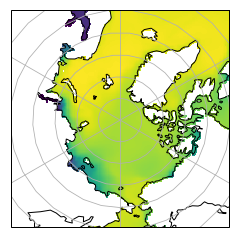

In [9]:
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180, globe=False))
ax.coastlines()
ax.gridlines()


plt.pcolormesh(mitruns.lon, mitruns.lat, mitruns['mitb100_rho'][0,0,:,:],
    transform=ccrs.PlateCarree())

ax.set_extent([0, 359, 60, 90], ccrs.PlateCarree())


In [10]:
from mpl_toolkits.basemap import Basemap


In [11]:
m_NPS = Basemap(projection='npstere',boundinglat=60,lon_0=180,resolution='l')
x_mitgcm,y_mitgcm = m_NPS(mitruns.lon[:].data, mitruns.lat[:].data)


In [12]:
m_laea = Basemap(projection='laea',resolution='i',
                #llcrnrlon=-175, llcrnrlat=65, urcrnrlon=-100, urcrnrlat=80,
                width=2.5e6, height=2.5e6,
                lat_0=76,lon_0=-142.)

x_laea, y_laea = m_laea(mitruns.lon[:].data, mitruns.lat[:].data)


In [13]:
delta_depth = -np.concatenate(([-10], mitruns.Depth.diff(dim='Depth').data))

In [14]:
# average density of the top 200 m
k=16
rho1 = ((mitruns.mitb500_rho[0,:k,92,145]*delta_depth[:k]).mean().data
            /delta_depth[:k].mean())
rho2 = mitruns.mitb500_rho[0,22,92,145].data

print('rho1 = ', rho1)
print('rho2 = ', rho2)


rho1 =  1024.932026110609
rho2 =  1027.9422607421875


(-600, 0)

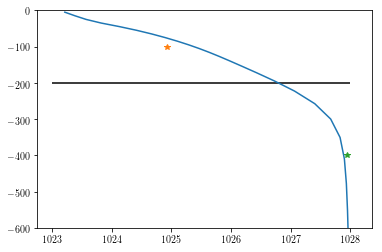

In [15]:
plt.plot(mitruns.mitb100_rho[0,:,92,145], mitruns.Depth)
plt.plot(rho1, -100, '*')
plt.plot(rho2, -400, '*')
plt.hlines(-200, 1023, 1028)
plt.ylim(-600,0)

In [16]:
gr = 9.8*(rho2 - rho1)/rho2
print(gr)

0.02869840118079116


## Calculate isopycnal depth anomaly across the gyre
Using salinity is more consistent with Arctic community. They should give almost the same answer

In [17]:
from numba.decorators import jit

@jit
def numba_zslice(q, p, p0, mask_val=np.NaN):
    
    N, M, L = q.shape[0], q.shape[1], q.shape[2]
    
    q_iso = np.empty((M, L))
    for i in range(L):
        for j in range(M):
            q_iso[j, i] = mask_val
            for k in range(N-1):
                if (((p[k, j, i] < p0) and (p[k+1, j, i] > p0)) 
#                     ((p[k, j, i] > p0) and (p[k+1, j, i] < p0))
                   ):
                    dp = p[k+1, j, i] - p[k, j, i]
                    dp0 = p0 - p[k, j, i]
                    dq = q[k+1, j, i] - q[k, j, i]
                    q_iso[j, i] = q[k, j, i] + dq*dp0/dp
    return q_iso

In [18]:
depth_array = np.zeros_like(mitruns.mitb1000_rho[0,:,:,:])
for j in range(depth_array.shape[1]):
    for i in range(depth_array.shape[2]):
        depth_array[:,j,i] = mitruns.Depth.data

In [19]:
mask_BG_prosh = np.ones_like(mitruns.mitb100_rho[0,0,:,:])
mask_BG_prosh[mitruns.lon<-170] = 0
mask_BG_prosh[mitruns.lon>-130] = 0
mask_BG_prosh[mitruns.lat<70.5] = 0
mask_BG_prosh[mitruns.lat>80.5] = 0
mask_BG_prosh[np.isnan(mitruns.mitb1000_rho[0,18,:,:])] = 0

mask_BG_prosh_inner = np.ones_like(mitruns.mitb100_rho[0,0,:,:])
# make inner mask inner_size grid cells smaller in all directions
border_width = 3

for j in range(border_width, mask_BG_prosh.shape[0]-border_width):
    for i in range(border_width, mask_BG_prosh.shape[1]-border_width):
        neighbours = np.zeros(border_width)
        for n in range(border_width):
            
            neighbours[n] = (mask_BG_prosh[j-n,i] +
                          mask_BG_prosh[j,i+n] +
                          mask_BG_prosh[j+n,i] +
                          mask_BG_prosh[j,i-n])

        if np.min(neighbours) < 4:
            mask_BG_prosh_inner[j,i] = 0

mask_BG_prosh_inner[:border_width,:] = 0
mask_BG_prosh_inner[-border_width:,:] = 0
mask_BG_prosh_inner[:,:border_width] = 0
mask_BG_prosh_inner[:,-border_width:] = 0


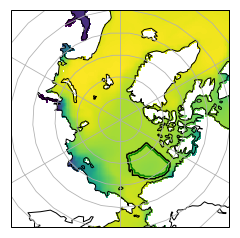

In [20]:
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180, globe=False))
ax.coastlines()
ax.gridlines()

# mitruns['mitb100_rho'][0,0,:,:].plot.pcolormesh(ax=ax,  x='x', y='y');

plt.pcolormesh(mitruns.lon, mitruns.lat, mitruns['mitb100_rho'][0,0,:,:],
    transform=ccrs.PlateCarree())#AzimuthalEquidistant(central_latitude=90))

ax.set_extent([0, 359, 60, 90], ccrs.PlateCarree())

plt.contour(mitruns.lon, mitruns.lat,mask_BG_prosh, [0.99], colors='k', transform=ccrs.PlateCarree())
plt.contour(mitruns.lon, mitruns.lat,mask_BG_prosh_inner, [0.99], colors='g', transform=ccrs.PlateCarree())


In [21]:
mask_BG_prosh_edge = mask_BG_prosh - mask_BG_prosh_inner

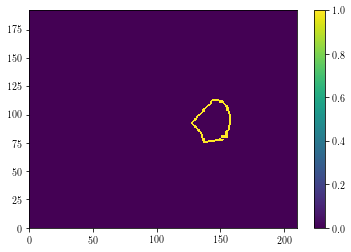

In [22]:
plt.pcolormesh(mask_BG_prosh_edge)
plt.colorbar()

### Use salinity

(28, 35)

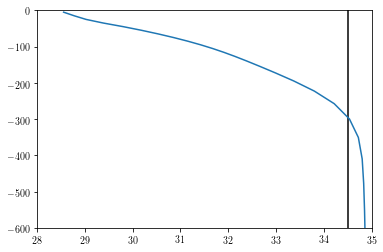

In [23]:
plt.plot(mitgcm_mean_salt['Smean_500'][145,92,:], mitruns.Depth)
# plt.plot(rho1, -100, '*')
# plt.plot(rho2, -400, '*')
# plt.hlines(-200, 1023, 1028)
plt.vlines(34.5, -600,0)
plt.ylim(-600,0)
plt.xlim(28,35)

# Using salinity around the edge of Proshutinsky's region

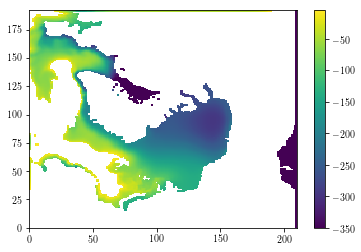

In [24]:
halocline = numba_zslice(depth_array, mitgcm_mean_salt['Smean_500'].transpose(), 34.5)

plt.pcolormesh(halocline, vmin=-350)
plt.colorbar()

In [25]:
# now loop through each of the kappa_gm values and find the depth difference

expts = ['Smean_50', 'Smean_100', 'Smean_300', 'Smean_500', 'Smean_800', 'Smean_1000', 'Smean_2000']
delta_h = np.ones(len(expts))


for counter, exp in enumerate(expts):
    halocline = numba_zslice(depth_array, mitgcm_mean_salt[exp].transpose(), 34.5)

    halocline_ma = np.ma.masked_where(mask_BG_prosh==0, halocline)
    halocline_ma_edge = np.ma.masked_where(mask_BG_prosh_edge==0, halocline)

    h_edge = np.nanmean(halocline_ma_edge)
#     print(h_edge)
    h_centre = np.nanmin(halocline_ma)
#     print(h_centre)

    delta_h[counter] = h_edge - h_centre

[62.40285121 60.80301171 49.72496865 36.55104102 27.52333344 23.31788196
 14.96693917]


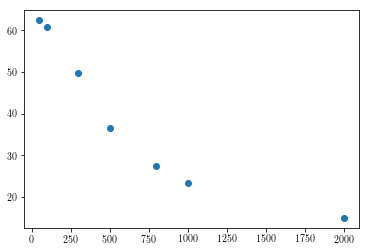

In [26]:
print(delta_h)

plt.plot(kappa, delta_h, 'o')

# Overview figure

In [27]:
halocline = numba_zslice(depth_array, mitgcm_mean_salt['Smean_500'].transpose(), 34.5)


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less


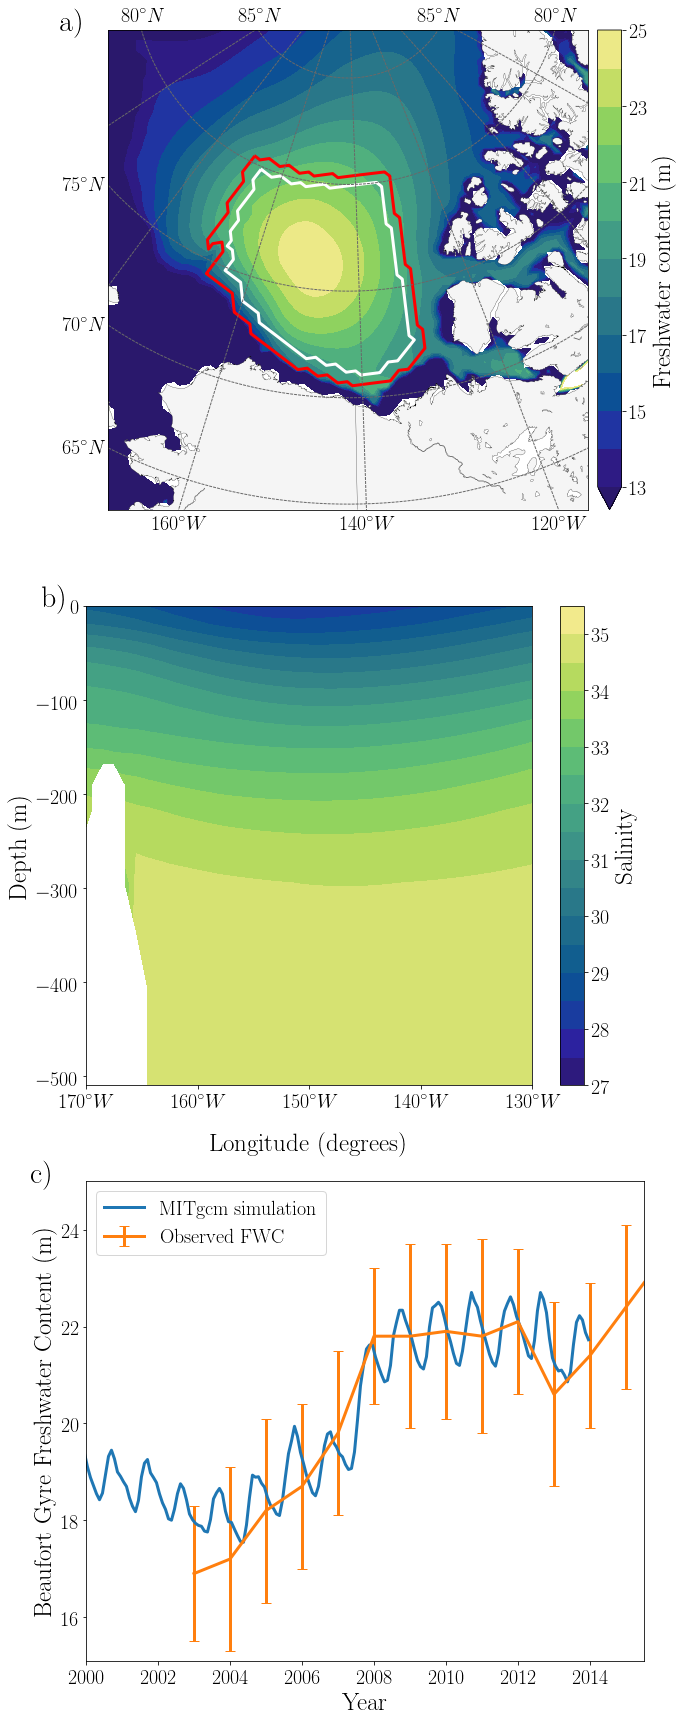

In [28]:
# laea version

fig = plt.figure(figsize=(10,30))

ax = fig.add_subplot(311)

# draw coastlines, country boundaries, fill continents.
m_laea.drawcoastlines(linewidth=0.25)
m_laea.drawcountries(linewidth=0.25)
m_laea.fillcontinents(color='whitesmoke',lake_color='white')

m_laea.drawmeridians(np.arange(0,360,20),'dimgrey',dashes=[3,1], latmax=90,
                      labels=[False,False,False,True],
                      linewidth=1,fontsize=20)
m_laea.drawparallels(np.arange(-90,90,5),'dimgrey',dashes=[3,1],
                      labels=[True,False,True,False],
                      linewidth=1, fontsize=20);

im = m_laea.contourf(x_laea, y_laea, mitgcm_fwc_salinity['fwc_500'].transpose(),
                    np.arange(13,26,1),
#                      vmin=14, vmax=25,
                     cmap=cmocean.cm.haline, extend='min')

CB = m_laea.colorbar(im)
CB.ax.tick_params(labelsize=20)
# CB.set_ticks(np.arange(-1,1.1,0.2))
CB.set_label('Freshwater content (m)',fontsize=25)

# will only run after the halocline is extracted below
# CS = m_laea.contour(x_laea, y_laea, -halocline, np.arange(0,400,10), colors='k', linewidths=2)
# plt.clabel(CS, inline=1, fontsize=15, fmt='%1.0f')

# m_laea.contour(x_laea, y_laea, mask_BG, [0.9999], colors='w', linewidths=3, zorder=10)
# m_laea.contour(x_laea, y_laea, mask_BG_small, [0.9999], colors='b', linewidths=3, zorder=10)
m_laea.contour(x_laea, y_laea, mask_BG_prosh, [0.9999], colors='r', linewidths=3)
m_laea.contour(x_laea, y_laea, mask_BG_prosh_inner, [0.9999], colors='w', linewidths=3)
# m_laea.contour(x_laea, y_laea, mask_BG_prosh, [0.9999], colors='r', linewidths=3)

ax.text(-0.1,1, 'a)', fontsize=30, transform=ax.transAxes)


##################################

# final 25 year mean of salinity

ax = fig.add_subplot(312)


plt.contourf(slon, mitgcm_fwc_salinity['rc'][:,0]+5, 
               np.ma.masked_where(mitgcm_fwc_salinity['Slatlon'][:,165,:]<27,
                                   mitgcm_fwc_salinity['Slatlon'][:,165,:]).transpose(),
             np.arange(27, 36, 0.5), cmap=cmocean.cm.haline 
#              vmin=25, vmax=35
            )
CB = plt.colorbar()

CB.ax.tick_params(labelsize=20)
# CB.set_ticks(np.arange(-1,1.1,0.2))
CB.set_label('Salinity',fontsize=25)


plt.xlim(190,230)
locs, labels = plt.xticks()
xlocs= np.arange(190,240,10)
xlabels = ['$170^{\circ}W$', '$160^{\circ}W$', '$150^{\circ}W$', '$140^{\circ}W$',
           '$130^{\circ}W$', '$120^{\circ}W$']
plt.xticks(xlocs, xlabels, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-510,0)

plt.ylabel('Depth (m)', fontsize=25)
plt.xlabel('Longitude (degrees)', fontsize=25, labelpad=20)

ax.text(-0.1,1, 'b)', fontsize=30, transform=ax.transAxes)

#######################################
ax = fig.add_subplot(313)

ax.plot(mitgcm_fwc_salinity['mitb500_fwcbg'][:,0],
         mitgcm_fwc_salinity['mitb500_fwcbg'][:,1], label='MITgcm simulation', linewidth=3)
ax.errorbar(prosh_fwc.index, prosh_fwc['FWC'], yerr=prosh_fwc['RMS'],
             capsize=5, label='Observed FWC', linewidth=3)
plt.xlim(2000, 2015.5)
plt.ylim(15.1, 25)

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('Beaufort Gyre Freshwater Content (m)', fontsize=25)
plt.xlabel('Year', fontsize=25)

ax.text(-0.1,1, 'c)', fontsize=30, transform=ax.transAxes)


plt.savefig('/Users/doddridge/Desktop/BG_overview.pdf', bbox_inches='tight')

## Extract  parameters


In [29]:
from scipy.optimize import curve_fit

In [30]:
sims = ['mitb50', 'mitb100', 'mitb300', 'mitb500', 'mitb800', 'mitb1000', 'mitb2000']


In [31]:
ice_speed = np.zeros(len(sims))
alpha = np.zeros(len(sims))
rel_speed = np.zeros(len(sims))
cur_speed = np.zeros(len(sims))

for counter, exp in enumerate(sims):
    ice_speed[counter] = icedata['{0}_icesp'.format(exp)].mean()
    alpha[counter] = icedata['{0}_alpha'.format(exp)].mean()
    rel_speed[counter] = icedata['{0}_relsp'.format(exp)].mean()
    cur_speed[counter] = icedata['{0}_cursp'.format(exp)].mean()
    

In [32]:
f = 1.4e-4
omega = 7.2921159e-5
f = 2*omega*np.sin(np.deg2rad(75))

g = gr # diagnosed from simulations

Cdi = 5.5e-3

rho = rho1 # upper 200 m average density

Cda = 1.25e-3
rho_a = 1.25
ua = 2.5

ui = ice_speed.mean()
u_rel = rel_speed.mean()

R = 340e3

kappa_plot = np.arange(1,21000, 0.1)
kappa = np.array([50, 100, 300, 500, 800, 1000, 2000])
kappa_eff = kappa + ((R)**2)*6e-6/(100**2)
print(kappa_eff)


[ 119.36  169.36  369.36  569.36  869.36 1069.36 2069.36]


In [33]:
# h_eq from ug
cur_speed*f*R/g

array([66.05185868, 67.96303089, 66.68086041, 62.50794801, 58.70467237,
       56.96462783, 53.56193292])

In [34]:
# h_eq if ug = uice = ug
ice_speed*1.4e-4*350e3/6.22e-2

array([69.3729993 , 69.90769249, 70.05075981, 69.22571773, 68.35154854,
       67.93182571, 66.96930988])

In [35]:
k_crit = (2.*np.sqrt(alpha.mean()*Cdi*g*g*(alpha.mean()*Cdi*ui*ui*rho + 
                                   (1-alpha.mean())*Cda*ua*ua*rho_a)/rho)/(f**2) 
          - 2.*alpha.mean()*Cdi*ui*g/(f**2))
print(k_crit)

20.90511627552769


In [36]:
def h_gov(kappa, R):
    h_eq = (ui*f*R/g + 
            ((R*f**3)/(2.*alpha.mean()*Cdi*g**2))*(kappa - 
                np.sqrt(kappa*(kappa + 4.*alpha.mean()*Cdi*ui*g/f**2) 
                        - 4.*alpha.mean()*(1.-alpha.mean())*Cda*rho_a*Cdi*ua*ua*g*g/(rho*f**4))))
    return h_eq

def h_gov_below(kappa, R):
    h_eq = (ui*f*R/g - 
            ((R*f**3)/(2.*alpha.mean()*Cdi*g**2))*(kappa - 
                np.sqrt(kappa*(kappa - 4.*alpha.mean()*Cdi*ui*g/f**2) 
                        + 4.*alpha.mean()*(1.-alpha.mean())*Cda*rho_a*Cdi*ua*ua*g*g/(rho*f**4))))
    
    return h_eq


def h_eddies(kappa, R):
    return (1-alpha.mean())*(R*rho_a*Cda*ua**2)/(f*rho*kappa) + alpha.mean()*(R*Cdi*u_rel**2)/(f*kappa)


In [37]:
# fit equations to the simulations to see what the best estimate of gyre radius is

popt, pcov = curve_fit(h_gov, kappa_eff[:], delta_h[:], p0=[300e3])
print('Governor, R = ', popt/1e3)
h_gov_est = h_gov(kappa_plot, R)#popt[0])
h_gov_below_est = h_gov_below(kappa_plot, R)#popt[0])

popt, pcov = curve_fit(h_eddies, kappa_eff[:], delta_h[:], p0=[300e3])
print('Eddies, R = ', popt/1e3)
h_eddies_est22 = h_eddies(kappa_plot, 50e3)#popt[0])
h_eddies_est300 = h_eddies(kappa_plot, R)#popt[0])

# pure governor kappa=0, alpha=1
pure_gov = h_gov_below(0, R)#ui*f*R/g

Governor, R =  [215.94487104]
Eddies, R =  [41.35668296]


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


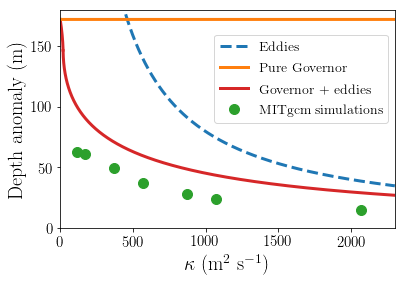

In [38]:
E300, = plt.plot(kappa_plot, h_eddies_est300, '--', label='Eddies', linewidth=3, color='C0')
sims, = plt.plot(kappa_eff, delta_h, 'o', label='MITgcm simulations', color='C2', ms=10)
G_E, = plt.plot(kappa_plot[kappa_plot>k_crit], h_gov_est[kappa_plot>k_crit],
                label='Governor + eddies', linewidth=3, color='C3')
plt.plot(kappa_plot[kappa_plot<k_crit], h_gov_below_est[kappa_plot<k_crit], 
label='Governor + eddies, $R = 226$ km', linewidth=3, color='C3')

G, = plt.plot(kappa_plot, kappa_plot*0 + h_gov_below_est[0], label='Pure Governor', linewidth=3, color='C1')

plt.legend(handles=[E300, G, G_E, sims], bbox_to_anchor=(0.44, 0.45))#loc='best')

plt.xlabel('$\kappa$ (m$^{2}$ s$^{-1}$)', fontsize=20)
plt.ylabel('Depth anomaly (m)', fontsize=20)
plt.ylim(0,180)
plt.xlim(0, 2300)
plt.tick_params(labelsize=15)
# plt.savefig('/Users/doddridge/Desktop/governor_eddy_comparison.pdf', bbox_inches='tight')